In [1]:
import utils
import models
import train
import datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train, y_train = datasets.load_train_dataset()
X_test, y_test = datasets.load_test_dataset()

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

/Users/injaelee/Documents/ubion/mzcard/utils.py:72: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='vlag', annot=True, annot_kws={"size": 24})


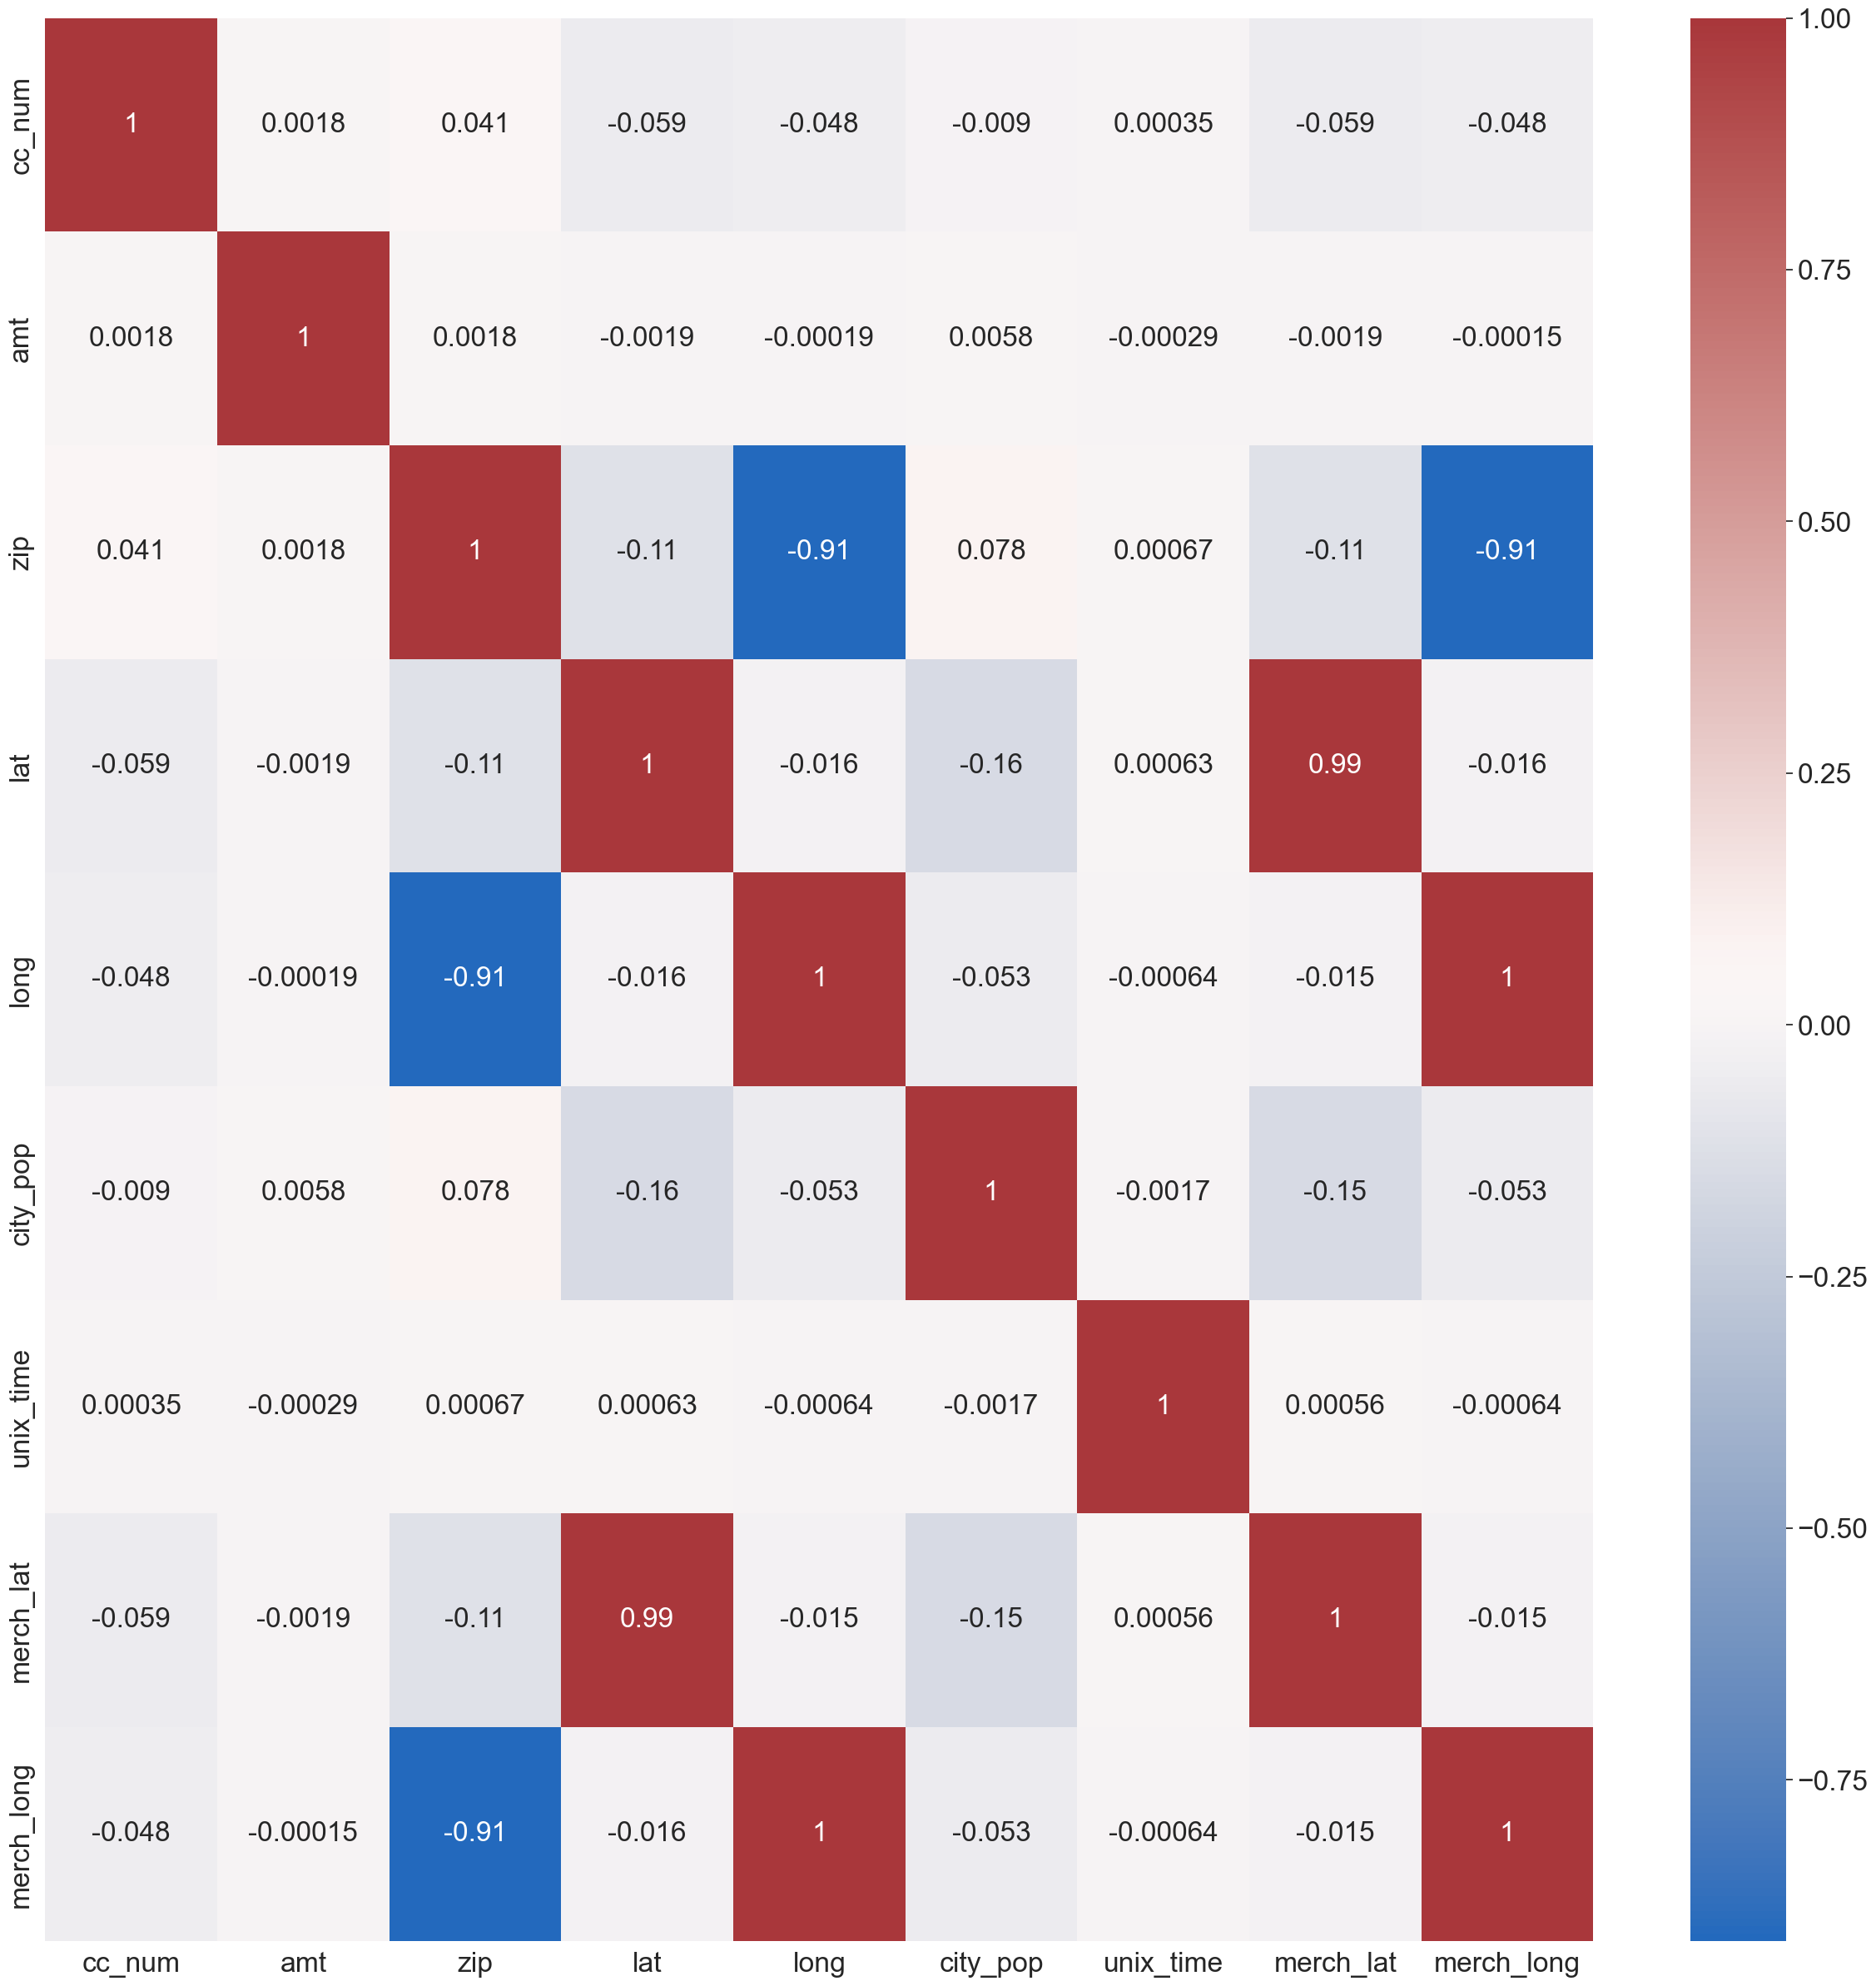

In [4]:
utils.draw_heatmap(X_train)

In [5]:
X_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long'],
      dtype='object')

In [6]:
# 칼럼 이름 변경
utils.change_column_name(X_train, ("trans_date_trans_time", "trans_time"))
utils.change_column_name(X_test, ("trans_date_trans_time", "trans_time"))
# 레이블 인코딩
utils.convert_category_to_num_label(X_train, 'gender')
utils.convert_category_to_num_label(X_test, 'gender')
# 원핫 인코딩
X_train = utils.get_new_df_with_onehot_encoding(X_train, 'category', True)
X_test = utils.get_new_df_with_onehot_encoding(X_test, 'category', False)
# 나이 칼럼 추가
X_train['age'] = 2020 - X_train['dob'].dt.year
X_test['age'] = 2020 - X_test['dob'].dt.year

In [7]:
X_train.head()

,trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,NC,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,WA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,ID,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,MT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,VA,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_time               1296675 non-null  datetime64[ns]
 1   cc_num                   1296675 non-null  int64         
 2   merchant                 1296675 non-null  object        
 3   amt                      1296675 non-null  float64       
 4   first                    1296675 non-null  object        
 5   last                     1296675 non-null  object        
 6   gender                   1296675 non-null  int64         
 7   street                   1296675 non-null  object        
 8   city                     1296675 non-null  object        
 9   state                    1296675 non-null  object        
 10  zip                      1296675 non-null  int64         
 11  lat                      1296675 non-null  float64       
 12  

In [9]:
#vif = utils.get_vif(X_train)
#vif

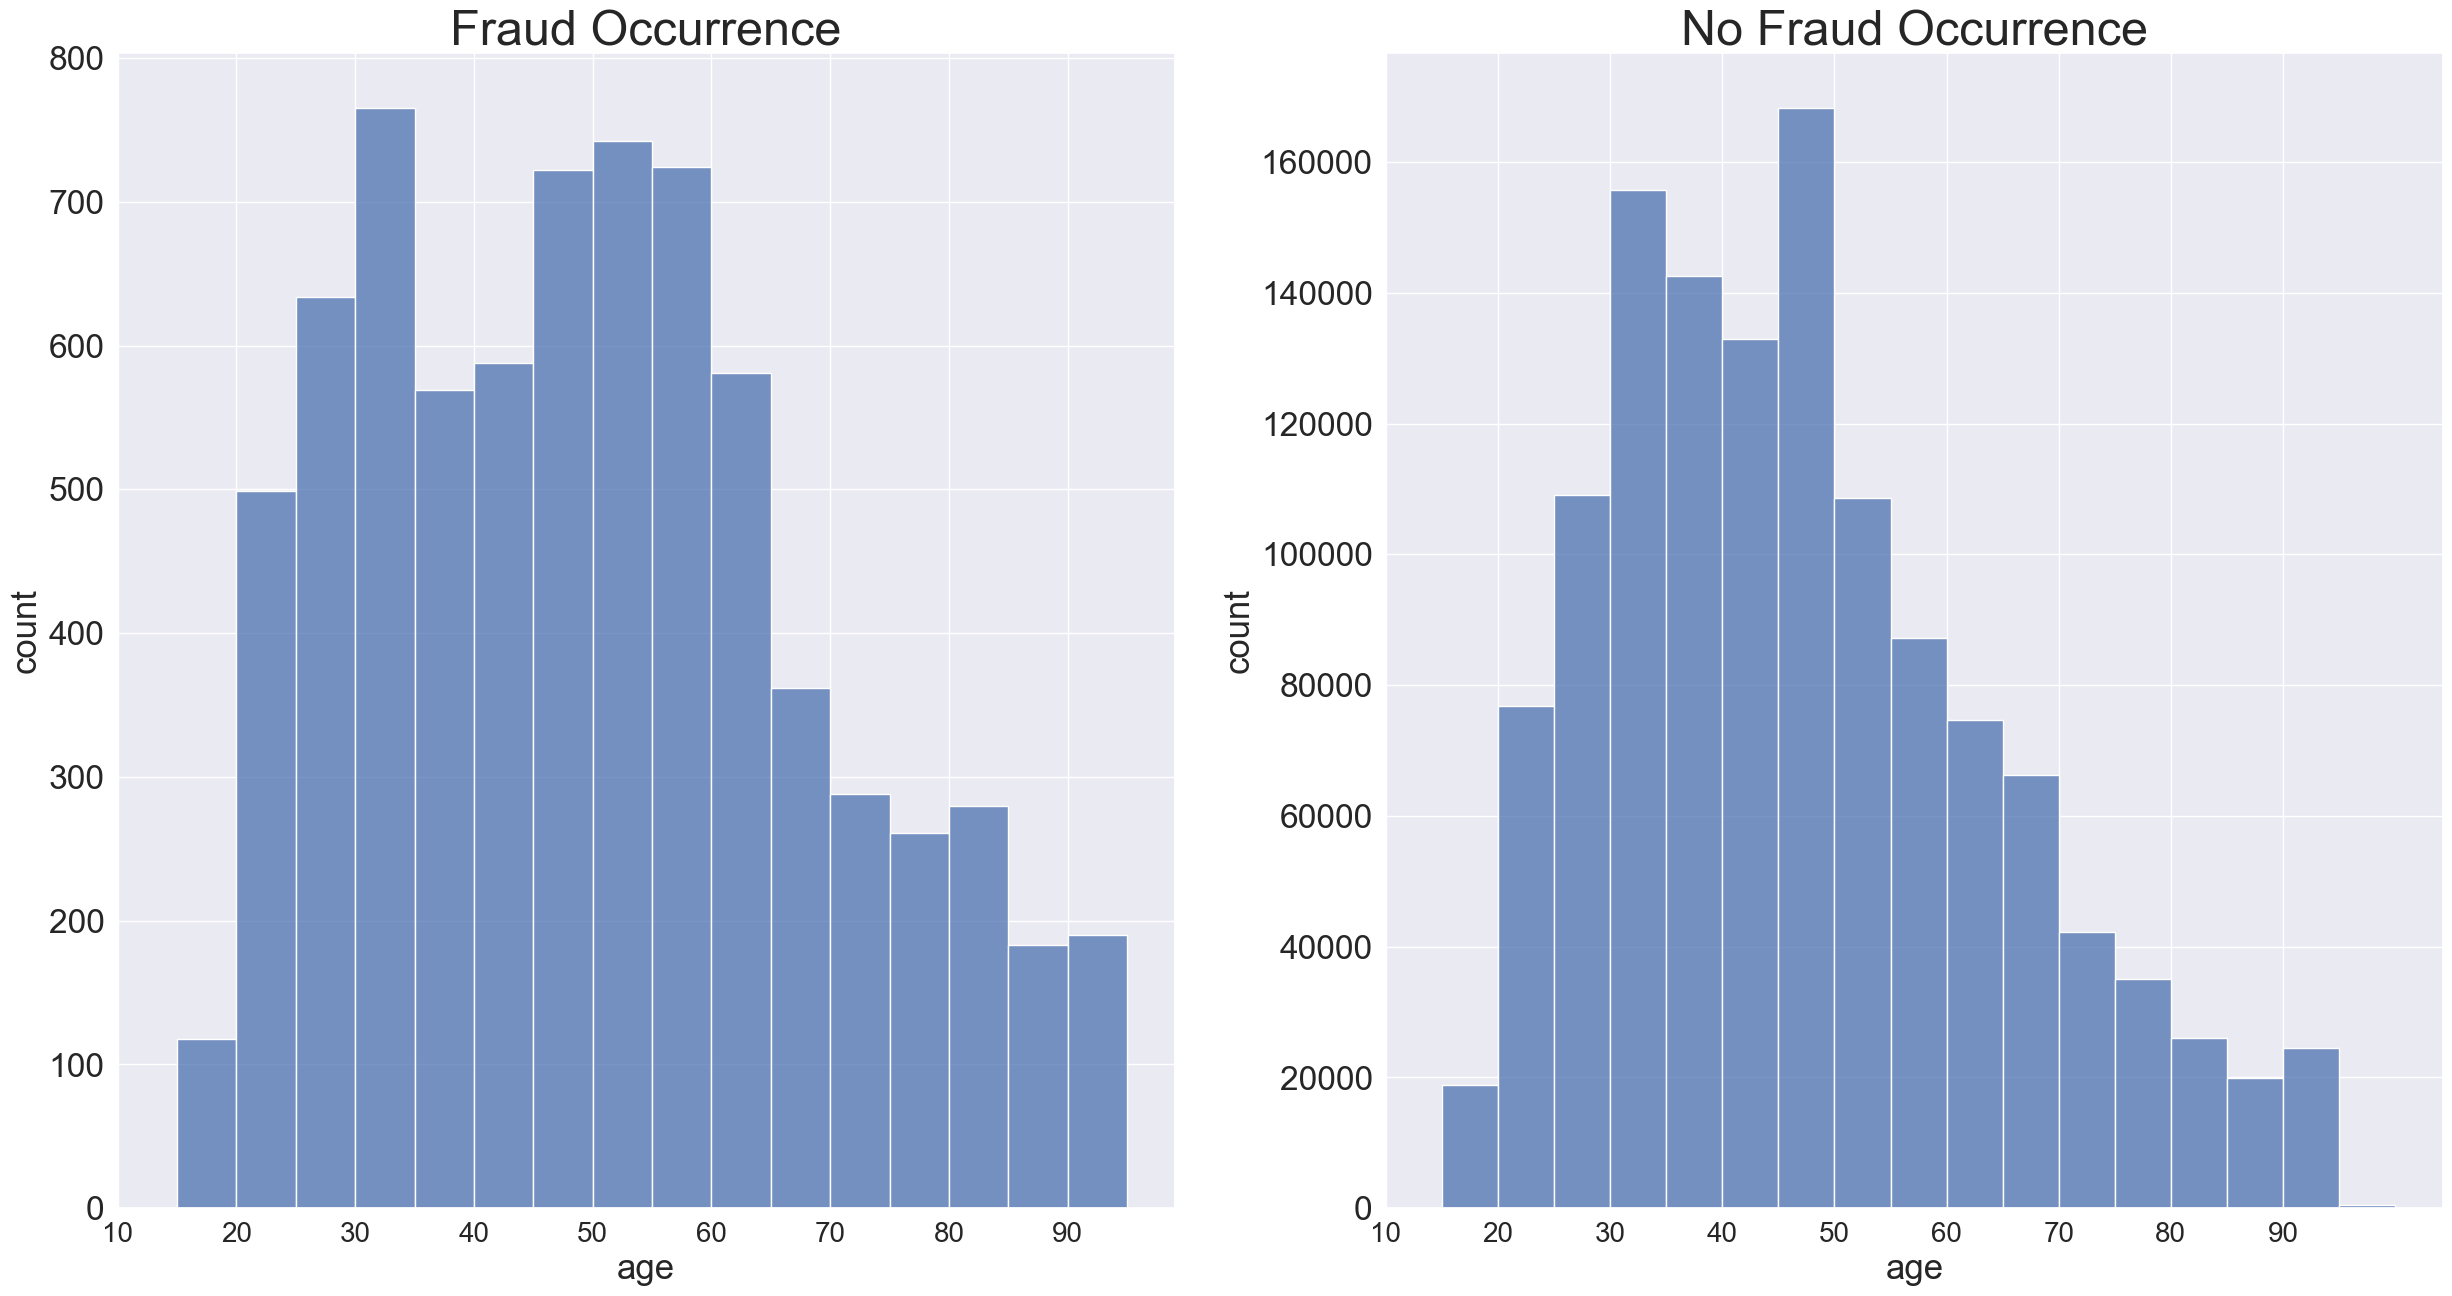

In [10]:
plt.figure(figsize=(30,15))

plt.subplot(1, 2, 1)
ax1 = sns.histplot(x='age',data=X_train.loc[y_train==1,:], common_norm=False, stat='count', multiple='stack', binwidth=5)
ax1 = utils.set_plot_labels(ax1, 'Fraud Occurrence', 'age', 'count', xticks=range(10, 100, 10))
plt.subplot(1, 2, 2)
ax2 = sns.histplot(x='age',data=X_train.loc[y_train==0,:], common_norm=False, stat='count', multiple='stack', binwidth=5)
ax2 = utils.set_plot_labels(ax2, 'No Fraud Occurrence', 'age', 'count', xticks=range(10,100,10))

plt.show()

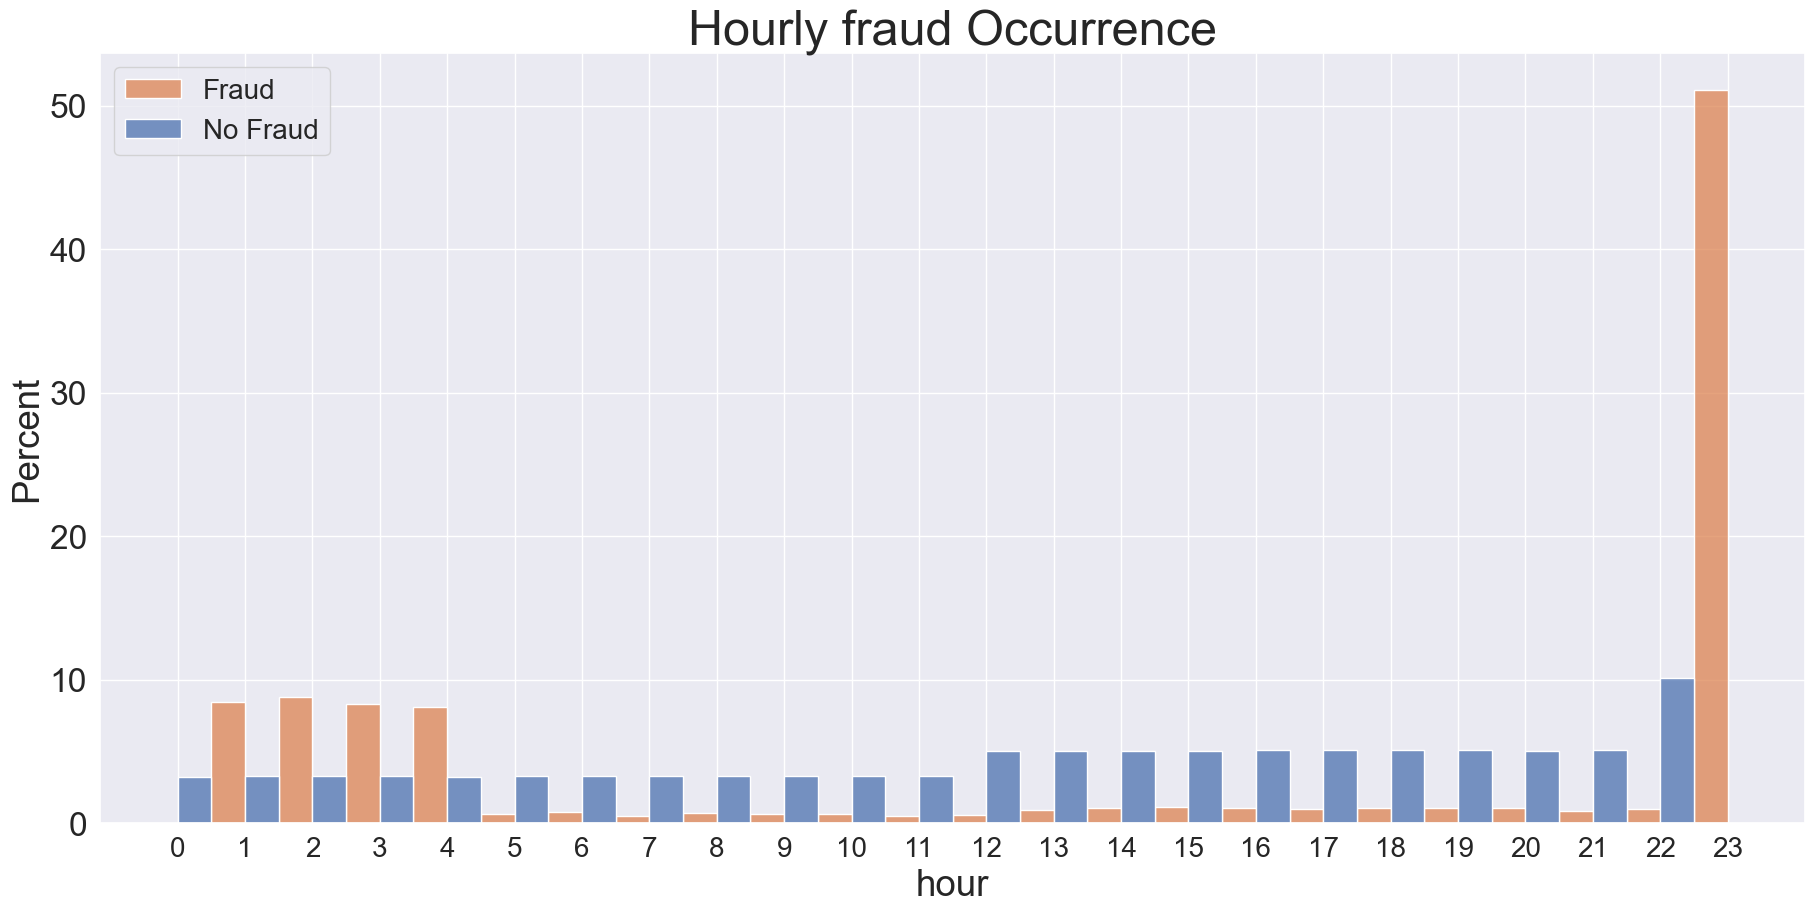

In [11]:
# hour and fraud histplot
plt.figure(figsize=(22,10))
hour_df = pd.DataFrame(X_train['trans_time'].dt.hour.values, columns=['hour'])
ax = sns.histplot(data=pd.concat([hour_df, y_train], axis=1), x="hour", hue='is_fraud', common_norm=False, stat='percent', multiple='dodge', binwidth=1)
utils.set_plot_labels(ax1, 'Hourly fraud Occurrence', 'Hour', 'Percentage', ['Fraud', 'No Fraud'], range(0,24,1))
plt.show()

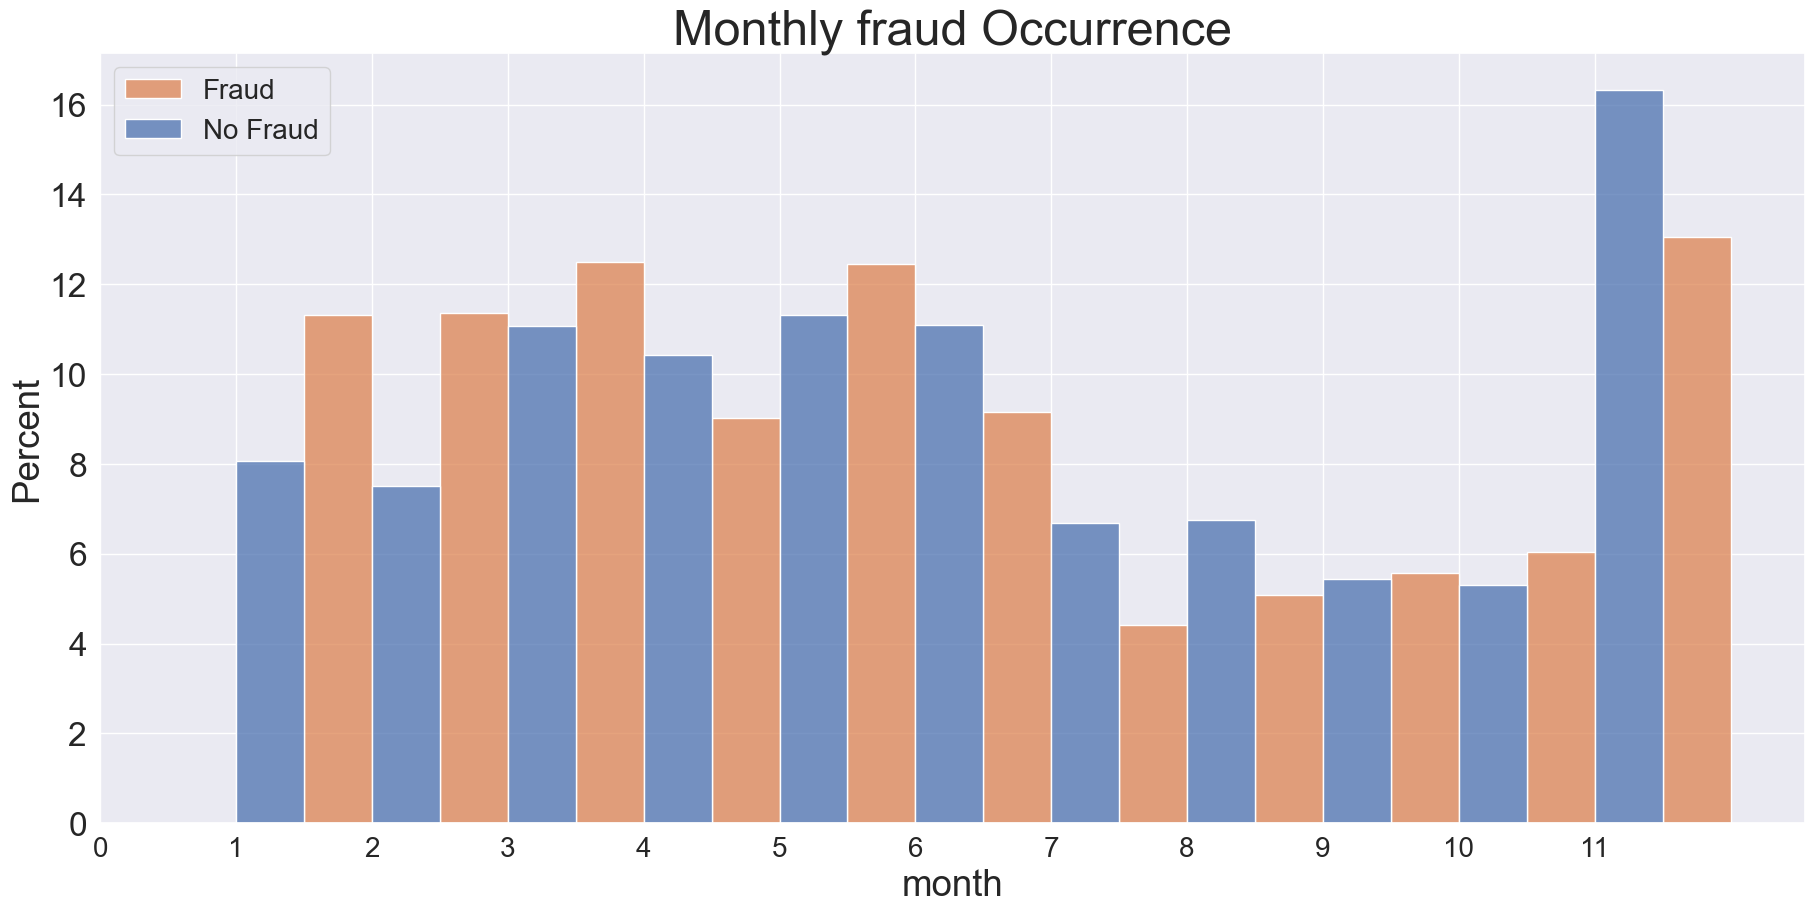

In [13]:
# hour and fraud histplot
plt.figure(figsize=(22,10))
mount_df = pd.DataFrame(X_train['trans_time'].dt.month.values, columns=['month'])
ax = sns.histplot(data=pd.concat([mount_df, y_train], axis=1), x="month", hue='is_fraud', common_norm=False, stat='percent', multiple='dodge', binwidth=1)
utils.set_plot_labels(ax1, 'Monthly fraud Occurrence', 'Month', 'Percentage', ['Fraud', 'No Fraud'], range(0,12,1))
plt.show()